In [1]:
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
import sympy as syp
from astropy import units as u
import radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from dendrocat.aperture import Ellipse
from regions import Regions, PixCoord
from astropy import stats
from itertools import chain
from radio_beam import Beams
from astropy.convolution import convolve
import astropy.constants as c

W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'

w51n_b6_conv = w51conv + 'w51n_new_nocorr_in_area_B6_conv.fits'
#w51n_b3_conv = w51conv + 'w51n_B3_conv.fits'
#w51e_b3_conv = w51conv + 'w51e_B3_conv.fits'
w51e_b6_conv = w51conv + 'w51e_new_nocorr_in_area_B6_conv.fits'


w51e_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51e_matched.fits'
w51n_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51n_matched.fits'

w51e_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b3_std_sky.reg'
w51e_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b6_std_sky.reg'
w51n_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b3_std_sky.reg'
w51n_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b6_std_sky.reg'
w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'


photometrydir = '/home/t.yoo/w51/catalogue/photometry/'
w51e_b3_flux = photometrydir+'w51e_b3_flux_size.fits'
w51n_b3_flux = photometrydir+'w51n_b3_flux_size.fits'
w51e_b6_flux = photometrydir+'w51e_b6_flux_size.fits'
w51n_b6_flux = photometrydir+'w51n_b6_flux_size.fits'
w51e_b6_conv_flux = photometrydir+'w51e_b6_conv_flux_size.fits'
w51n_b6_conv_flux = photometrydir+'w51n_b6_conv_flux_size.fits'







In [2]:
from astropy.table import Table
import matplotlib as mpl
import emcee
import corner
import scipy.integrate as integrate
from scipy.optimize import minimize

def kappa(nu, nu0=271.1*u.GHz, kappa0=0.0114*u.cm**2*u.g**-1, beta=1.75):
    """
    Compute the opacity $\kappa$ given a reference frequency (or wavelength)
    and a power law governing the opacity as a fuction of frequency:
    $$ \kappa = \kappa_0 \left(\\frac{\\nu}{\\nu_0}\\right)^{\\beta} $$
    The default kappa=0.0114 at 271.1 GHz comes from extrapolating the
    Ossenkopf & Henning 1994 opacities for the thin-ice-mantle, 10^6 year model
    anchored at 1.0 mm with an assumed beta of 1.75.
    Parameters
    ----------
    nu: astropy.Quantity [u.spectral() equivalent]
        The frequency at which to evaluate kappa
    nu0: astropy.Quantity [u.spectral() equivalent]
        The reference frequency at which $\kappa$ is defined
    kappa0: astropy.Quantity [cm^2/g]
        The dust opacity per gram of H2 along the line of sight.  Because of
        the H2 conversion, this factor implicitly includes a dust to gas ratio
        (usually assumed 100)
    beta: float
        The power-law index governing kappa as a function of nu
    """
    return (kappa0*(nu.to(u.GHz,u.spectral())/nu0.to(u.GHz,u.spectral()))**(beta)).to(u.cm**2/u.g)


def BB(freq, temp):
    B_nu = (2 * freq**3 *c.h / (c.c**2) * 1 / (np.e**(c.h*freq/(c.k_B*temp))-1))
    return B_nu
#def find_opt_thick_radius(rarr, kappa, rho):
#    
#    kappa*rho*

def get_flux_aperture(theta, rarr, freqb3, freqb6, dist=5.41*u.kpc, r_0 = 1*u.au, verbose=False ):
    rmax = rarr[-1]
    dr = rarr[1:] - rarr[:-1]
    dr = np.append(dr, rarr[-1])
    T1, T2, logrho_0, alpha = theta
    rho_0 = 10**logrho_0 *u.g / u.cm**3
    #print(rho_0)
    
    rho_r =  rho_0 * (rarr/r_0)**(-alpha)
    
    kappa_b3 = kappa(freqb3)
    kappa_b6 = kappa(freqb6)
    #print('ho',(rho_0*kappa_b3*r_0).to(u.cm/u.cm))

    au_to_cm = (1*u.au).to(u.cm)
    #print((kappa_b3*rho_0*r_0).to(u.au/u.au), alpha)
    r_b3thick = r_0 * (1+(1-alpha)/kappa_b3/rho_0/r_0)**(1/(1-alpha))
    r_b6thick = r_0 * (1+(1-alpha)/kappa_b6/rho_0/r_0)**(1/(1-alpha))

    #r_b3thick = (1-alpha + kappa_b3.value * rho_0.value * r_0.value * au_to_cm.value) / (kappa_b3.value * rho_0.value * (r_0.value * au_to_cm.value)**alpha)**(1/(1-alpha)) / au_to_cm.value
    #r_b6thick = (1-alpha + kappa_b6.value * rho_0.value * r_0.value * au_to_cm.value) / (kappa_b6.value * rho_0.value * (r_0.value * au_to_cm.value)**alpha)**(1/(1-alpha)) / au_to_cm.value
   # print('r_b3thick', r_b3thick)
   # print('r_b6thick', r_b6thick)
    
    BBthick_b3 = BB(freqb3, T1*u.K)
    BBthick_b6 = BB(freqb6, T1*u.K)
    
    BBthin_b3 = BB(freqb3, T2*u.K)
    BBthin_b6 = BB(freqb6, T2*u.K)
    
    flux_b3_arr = []
    flux_b6_arr =  []
    flux_b3 = flux_b6 = 0*u.Jy
    for i,r in enumerate(rarr):
        if verbose:
            print('verbose turned on')
            print(i,r)
        int_uplim = np.sqrt(rmax**2-r**2)
        #int_lolim_b3 = np.max((np.sqrt(r_b3thick.value**2-r**2),np.sqrt(1-r**2)))
        #int_lolim_b6 = np.max((np.sqrt(r_b6thick.value**2-r**2),np.sqrt(1-r**2)))
      
        if r< r_b6thick.value and r_b3thick.value>0 and r_b6thick.value>0:
            if r<1 and 1>r_b3thick.value:
                int_lolim_b3 = np.sqrt(1-r**2)
            else:
                int_lolim_b3 = np.sqrt(r_b3thick.value**2-r**2)
            if r<1 and r>r_b6thick.value:
                int_lolim_b6 = np.sqrt(1-r**2)
            else:
                int_lolim_b6 = np.sqrt(r_b6thick.value**2-r**2)
                
            if any((int_lolim_b3 > int_uplim,int_lolim_b6 > int_uplim)): #completely optically thick
                tau_b3 = 0
                tau_b6 = 0
                I_b3 = BBthick_b3 
                I_b6 = BBthick_b6 
            else:
                tau_b3 = (kappa_b3 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim_b3, int_uplim) *u.au).to(u.cm/u.cm)[0] 
                tau_b6 = (kappa_b6 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim_b6, int_uplim) *u.au).to(u.cm/u.cm)[0] 

                #tau_b3 = (kappa_b3 * rho_0 * r_0**alpha / (1-alpha) * ((int_uplim)**(1-alpha) - (int_lolim_b3)**(1-alpha))).to(u.cm/u.cm) 
                #tau_b6 = (kappa_b6 * rho_0 * r_0**alpha / (1-alpha) * ((int_uplim)**(1-alpha) - (int_lolim_b6)**(1-alpha))).to(u.cm/u.cm) 

                I_b3 = BBthick_b3 * np.exp(-tau_b3) + BBthin_b3 * (1-np.exp(-tau_b3))
                I_b6 = BBthick_b6 * np.exp(-tau_b6) + BBthin_b6 * (1-np.exp(-tau_b6))
            if verbose:
                print('case 1 ', tau_b3, tau_b6, I_b3, I_b6)
            
        elif r>=r_b6thick.value and r<r_b3thick.value and r_b3thick.value>0 and r_b6thick.value>0:
            if 1>r_b6thick.value:
                int_lolim_b6 = np.sqrt(1-r**2)
            else:
                int_lolim_b6 = 0
                
            if 1>r_b3thick.value:
                int_lolim_b3 = np.sqrt(1-r**2)
            else:
                int_lolim_b3 = np.sqrt(r_b3thick.value**2-r**2)
            
            
            
            if int_lolim_b3 > int_uplim:
                tau_b3=0
                I_b3=BBthick_b3
            else:
                tau_b3 = (kappa_b3 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim_b3, int_uplim) *u.au).to(u.cm/u.cm)[0]
                I_b3 = BBthick_b3 * np.exp(-tau_b3) + BBthin_b3 * (1-np.exp(-tau_b3))

            tau_b6 = (kappa_b6 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim_b6, int_uplim) *u.au).to(u.cm/u.cm)[0]
            I_b6 = BBthin_b6 * (1-np.exp(-tau_b6))
            if verbose:
                print('case 2 ', tau_b3, tau_b6, I_b3, I_b6)

     
        else:
            if 1>r_b3thick.value:
                int_lolim_b3 = np.sqrt(1-r**2)
            else:
                int_lolim_b3 = 0
            if 1>r_b6thick.value:
                int_lolim_b6 = np.sqrt(1-r**2)
            else:
                int_lolim_b6 = 0
                
            tau_b3 = (kappa_b3 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim_b3, int_uplim) *u.au).to(u.cm/u.cm)[0]
            tau_b6 = (kappa_b6 * rho_0 * integrate.quad(lambda x: (np.sqrt(r**2+x**2)/r_0.value)**(-alpha), int_lolim_b6, int_uplim) *u.au).to(u.cm/u.cm)[0]
            I_b3 = BBthin_b3 * (1-np.exp(-tau_b3))
            I_b6 = BBthin_b6 * (1-np.exp(-tau_b6))
            if verbose:
                print('case 3 ', tau_b3, tau_b6, I_b3, I_b6)

           
            
        flux_b3 = flux_b3 + 2 * np.pi * r*u.au * dr[i]*u.au * I_b3 /dist**2
        flux_b6 = flux_b6 + 2 * np.pi * r*u.au * dr[i]*u.au * I_b6 /dist**2
        if verbose:
            print('flux', flux_b3, flux_b6)
        if any((~np.isfinite(flux_b3),~np.isfinite(flux_b6))):
            print('r, r_b3thick, r_b6thick, flux_b3, flux_b6, I_b3, I_b6, tau_b3, tau_b6, rho_0, kappa_b3, kappa_b6, int_lolim_b3, int_lolim_b6, int_uplim')
            print(r, r_b3thick, r_b6thick, flux_b3, flux_b6, I_b3, I_b6, tau_b3, tau_b6, rho_0, kappa_b3, kappa_b6, int_lolim_b3, int_lolim_b6, int_uplim) 
            raise ValueError('nan in flux calc')
        #print('flux_b3',flux_b3)

        flux_b3_arr.append(flux_b3.to(u.Jy).value)
        flux_b6_arr.append(flux_b6.to(u.Jy).value)
        
        
    
    return flux_b3_arr, flux_b6_arr



def lnlike(theta, flux_b3, flux_b6, fluxerr_b3, fluxerr_b6, rarr,
           dist=5.41*u.kpc, freqb3=92982346121.91989*u.Hz, freqb6=226691598706.70853*u.Hz):
    model_b3, model_b6 = get_flux_aperture(theta, rarr, freqb3, freqb6, dist=dist)
    #print('hoho', flux_b3,model_b3)
    lnfluxerr_b3 = fluxerr_b3/flux_b3/np.log(10)
    lnfluxerr_b6 = fluxerr_b6/flux_b6/np.log(10)
    return -0.5* (np.sum((np.log10(flux_b3)-np.log10(model_b3))**2/lnfluxerr_b3**2) + 
                  np.sum((np.log10(flux_b6)-np.log10(model_b6))**2/lnfluxerr_b6**2))


def lnprior(theta):
    T1, T2, logrho_0, alpha = theta
    if 0 < T1 < 2000 and 0 < T2 < 2000 and -14 < logrho_0 < 5 and 1<alpha<10:
        return 0.0
    return -np.inf

def lnprob(theta, flux_b3, flux_b6, fluxerr_b3, fluxerr_b6, rarr):
    lp = lnprior(theta) 
    if not np.isfinite(lp):
        return - np.inf
    return lp + lnlike(theta, flux_b3, flux_b6, fluxerr_b3, fluxerr_b6, rarr)

def main(p0,nwalkers,niter,ndim,lnprob,data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)

    return sampler, pos, prob, state


def flux_gaussian_multiple_apertures(flux, major, minor, rarr): # major, minor in FWHM, au unit
    flux_rescaled = flux*major/minor # making a 2d symmetric Gaussian with FWHM = FWHM_major
    major_sigma = major/np.sqrt(8*np.log(2))
    peak_height = flux / 2 / np.pi/ major/ minor * 8 * np.log(2)
    flux_rarr =2*np.pi*major_sigma**2 * peak_height * (1 - np.exp(-rarr**2/2/major_sigma**2))
    return flux_rarr
def get_mass(rho_0, alpha):
    mass = rho_0 * u.g /u.cm**3 * 4* np.pi /(3-alpha) * (500**(3-alpha) - 1) * u.au **3
    return mass.to(u.Msun)


### W51-E

flux_apertures [4.18700722e-08 1.66584323e-07 6.62587646e-07 2.63251240e-06
 1.04131507e-05 4.04780430e-05 1.47048011e-04 4.19100730e-04
 6.52799919e-04 6.65581914e-04] [1.11589800e-06 4.43911439e-06 1.76470661e-05 6.99637972e-05
 2.74419694e-04 1.03204312e-03 3.31678914e-03 6.62700386e-03
 7.27085507e-03 7.27132681e-03]
209.93499033100812 134.40661566735128
spectral index 2.6829934050098
flux 0.0005865685801980568 0.006688137605271487
Running burn-in...
Running production...
elapsed time,  2654.9591825008392
[934.8567732   81.44655612  -3.57391428   4.69485042]
r_thick 1.0000001430078709 AU 1.0000000300641345 AU
mass 3329.83692521821 solMass
verbose turned on
0 1.0
case 1  4871034.078667228 23179966.152000777 2.1047174489284464e-16 Hz3 J s3 / m2 1.2019502332749488e-15 Hz3 J s3 / m2
flux 1.0564208652522146e-07 Jy 6.032949012100819e-07 Jy
verbose turned on
1 1.994736598775028
case 3  380121.2892280213 1808145.2410699492 2.1047174489284464e-16 Hz3 J s3 / m2 1.2019502332749488e-15 Hz3 J s

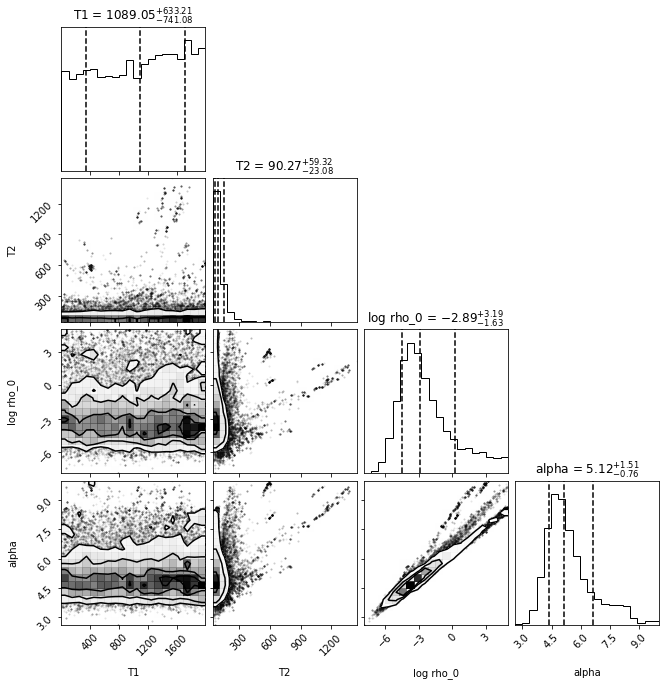

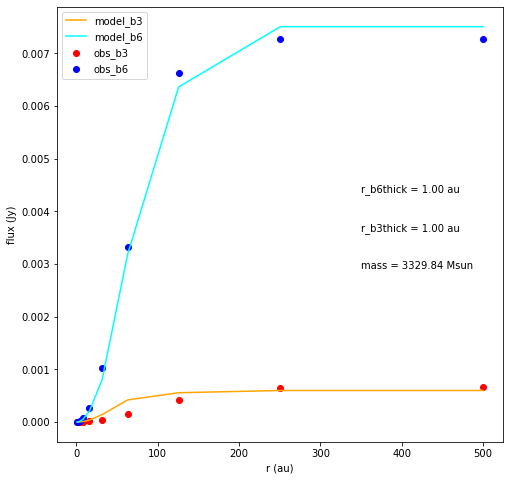

flux_apertures [7.16307751e-08 2.85007298e-07 1.13388309e-06 4.50926116e-06
 1.79038255e-05 7.06350815e-05 2.71761333e-04 9.49511736e-04
 2.38880670e-03 3.12427621e-03] [1.11640685e-05 4.44179885e-05 1.76681821e-04 7.02123474e-04
 2.77971656e-03 1.08422035e-02 3.99052325e-02 1.18882667e-01
 2.00874260e-01 2.08011600e-01]
348.32412637825206 227.2844652404475
spectral index 4.711042891346915
flux 0.0020729694756933177 0.12408639869796285
flux_apertures [5.81706707e-08 2.31435495e-07 9.20494461e-07 3.65659384e-06
 1.44545476e-05 5.60433073e-05 2.01604323e-04 5.56236960e-04
 8.21907830e-04 8.32207795e-04] [1.53576643e-06 6.10793745e-06 2.42584718e-05 9.58180435e-05
 3.70351376e-04 1.31661481e-03 3.49666338e-03 4.88968810e-03
 4.92548681e-03 4.92548683e-03]
199.15856870343785 94.29113521104178
spectral index 1.9952136937684346
flux 0.0006222344519150951 0.0035310445973215014
Running burn-in...
Running production...
elapsed time,  2379.611185312271
[242.40934609  98.59548715   4.6627785    8

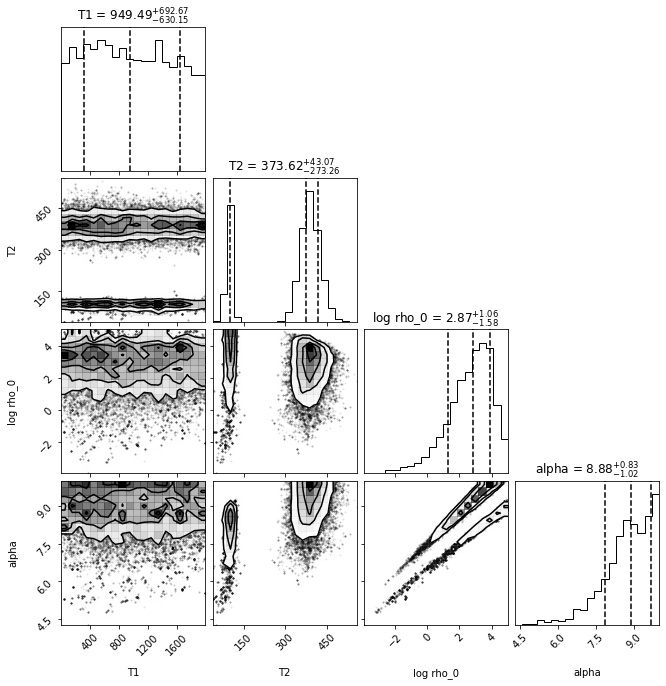

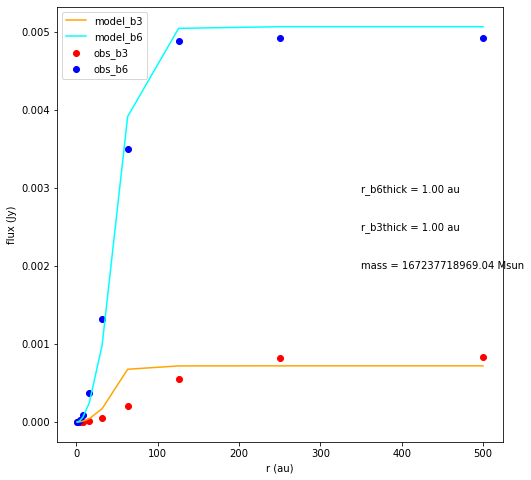

flux_apertures [1.36563484e-07 5.43340279e-07 2.16126755e-06 8.58904123e-06
 3.40086502e-05 1.32719296e-04 4.89465492e-04 1.46834133e-03
 2.51556176e-03 2.61360494e-03] [2.91092780e-06 1.15809969e-05 4.60565996e-05 1.82880481e-04
 7.21740193e-04 2.78030962e-03 9.76006697e-03 2.49132044e-02
 3.31324681e-02 3.32687395e-02]
230.35104684825234 178.006426752552
spectral index 2.85451346166689
flux 0.0020991947069285925 0.028673988865488113
Running burn-in...
Running production...
elapsed time,  2800.7780508995056
[1385.16621652  208.29814359   -4.80530682    3.96584405]
r_thick 1.0000024364327877 AU 1.000000512202459 AU
mass 342.12990819695375 solMass
verbose turned on
0 1.0
case 1  323598.7966672793 1541615.0783120047 5.473913629342529e-16 Hz3 J s3 / m2 3.2035911593483716e-15 Hz3 J s3 / m2
flux 2.7475215618942307e-07 Jy 1.6079785655771458e-06 Jy
verbose turned on
1 1.994736598775028
case 3  41860.782807801406 199121.64187148405 5.473913629342529e-16 Hz3 J s3 / m2 3.2035911593483716e-15 Hz3

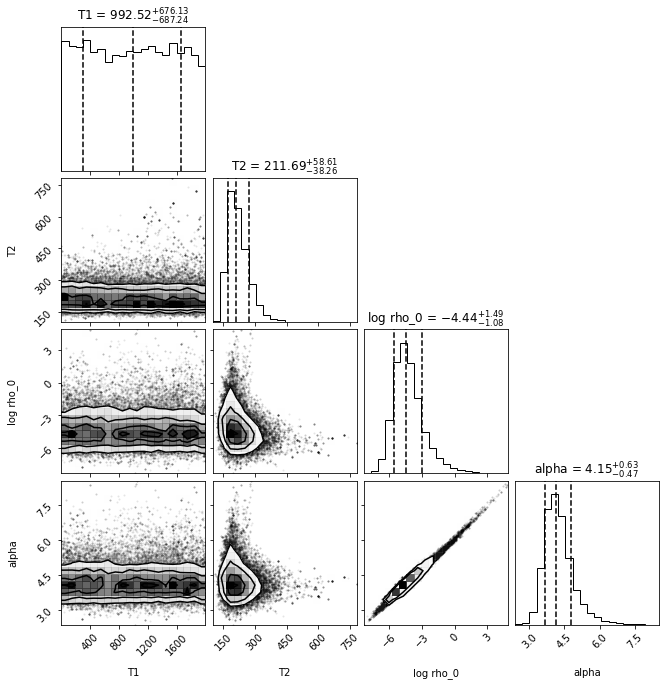

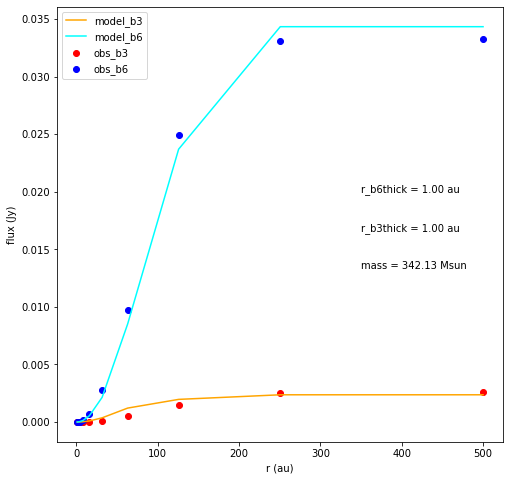

flux_apertures [5.40509881e-07 2.15005882e-06 8.54528496e-06 3.38477902e-05
 1.32282664e-04 4.90581168e-04 1.50043388e-03 2.67565055e-03
 2.81045992e-03 2.81047578e-03] [1.75346314e-06 6.97419785e-06 2.77060934e-05 1.09547940e-04
 4.25129839e-04 1.53466480e-03 4.28303380e-03 6.44351467e-03
 6.53814415e-03 6.53814446e-03]
120.06320949405654 101.66993369182045
spectral index 0.9473942562110295
flux 0.0019107592717923826 0.003249904952496175
flux_apertures [3.06044682e-07 1.21762001e-06 4.84291829e-06 1.92388538e-05
 7.60628306e-05 2.95086666e-04 1.06391554e-03 2.95723525e-03
 4.42042475e-03 4.48181257e-03] [1.75017647e-06 6.96332547e-06 2.76976898e-05 1.10062865e-04
 4.35643370e-04 1.69772200e-03 6.22748595e-03 1.83391926e-02
 3.03023202e-02 3.12248960e-02]
201.4975390759834 222.40594822543574
spectral index 2.1782202466258123
flux 0.003917385633544493 0.030514075394097083
Running burn-in...
Running production...
elapsed time,  2563.1042144298553
[362.39509656 125.30800103   4.89866826  

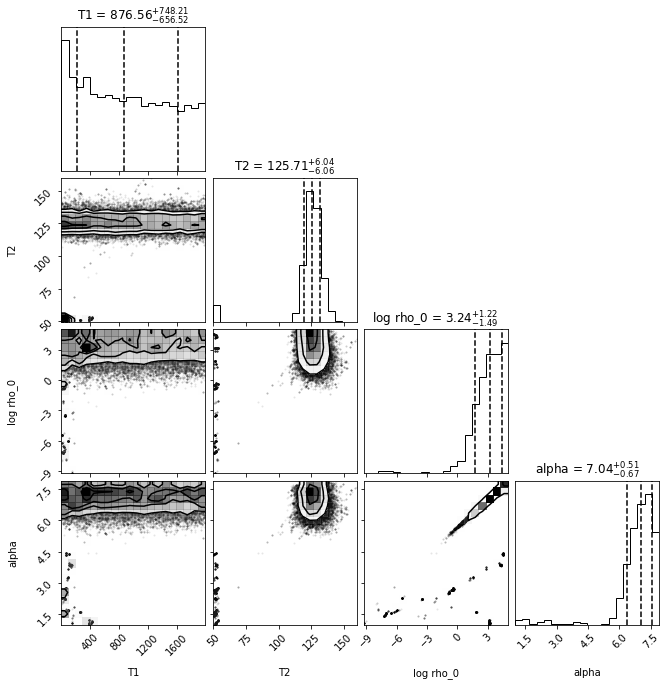

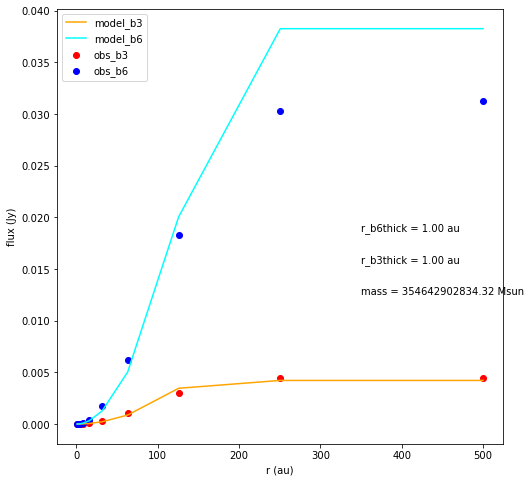

flux_apertures [1.19520972e-07 4.75548531e-07 1.89184193e-06 7.52199914e-06
 2.98415410e-05 1.17354377e-04 4.45865339e-04 1.48683856e-03
 3.26907552e-03 3.79129034e-03] [1.39072691e-06 5.53336336e-06 2.20123136e-05 8.75105514e-05
 3.47004405e-04 1.36197285e-03 5.13551312e-03 1.66603002e-02
 3.40767460e-02 3.78296986e-02]
296.61495603145124 274.6353330414088
spectral index 2.581280838277734
flux 0.003003972823396757 0.026445204207878048
Running burn-in...
Running production...
elapsed time,  2610.713285923004
[1780.11211078   84.10040801   -2.9695202     4.32599276]
r_thick 1.0000000355603276 AU 1.0000000074757471 AU
mass 17112.13815822328 solMass
verbose turned on
0 1.0
case 1  20805221.718489915 98984735.84712055 2.1751939511231273e-16 Hz3 J s3 / m2 1.2437904676159741e-15 Hz3 J s3 / m2
flux 1.0917951372079871e-07 Jy 6.242957707507439e-07 Jy
verbose turned on
1 1.994736598775028
case 3  2093686.6192962285 9959161.994479623 2.1751939511231273e-16 Hz3 J s3 / m2 1.2437904676159741e-15 Hz3

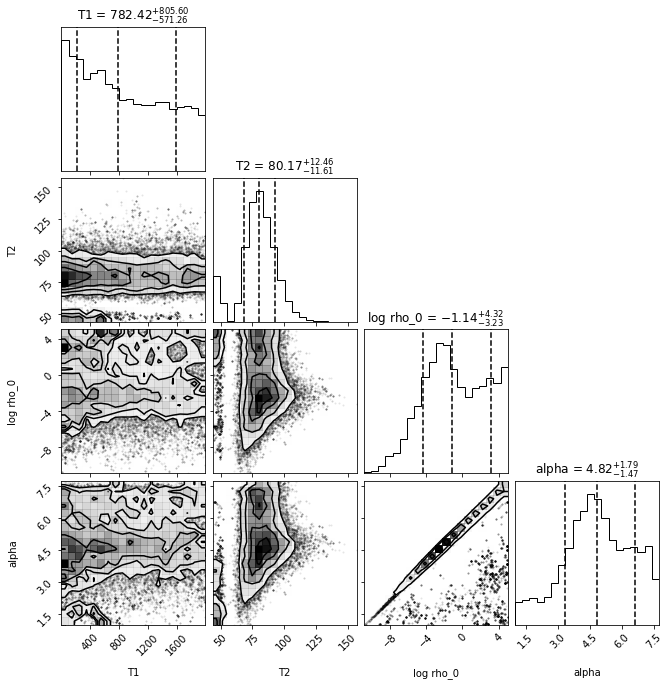

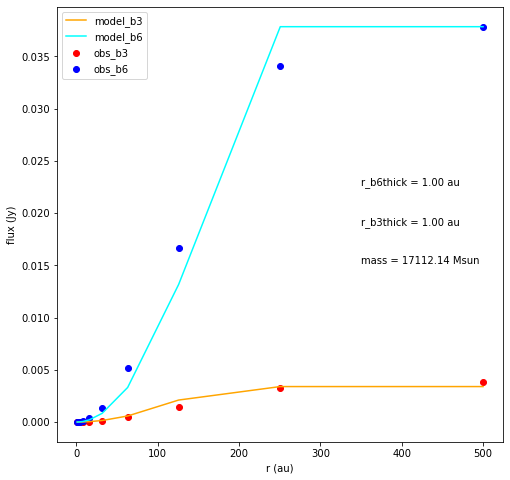

flux_apertures [1.65717150e-07 6.59329189e-07 2.62258227e-06 1.04214045e-05
 4.12492461e-05 1.60749408e-04 5.89640757e-04 1.73631062e-03
 2.86860543e-03 2.95586807e-03] [1.94016438e-06 7.71881108e-06 3.06962898e-05 1.21876459e-04
 4.80804631e-04 1.84941625e-03 6.45606435e-03 1.61990296e-02
 2.11232488e-02 2.11904988e-02]
222.3799412525949 174.01396859644743
spectral index 2.210281498470799
flux 0.0024977907170130797 0.019437552025959638
Running burn-in...
Running production...
elapsed time,  2405.0347061157227
[622.1743887   97.11379381   2.73636766   6.97371109]
r_thick 1.00000000000007 AU 1.0000000000000147 AU
mass 2901693630.580962 solMass
verbose turned on
0 1.0
case 1  7637525255382.05 36329878316468.586 2.5207949099057756e-16 Hz3 J s3 / m2 1.449005230595693e-15 Hz3 J s3 / m2
flux 1.265262632379389e-07 Jy 7.272992202541139e-07 Jy
verbose turned on
1 1.994736598775028
case 3  123459152181.9627 587265393468.7606 2.5207949099057756e-16 Hz3 J s3 / m2 1.449005230595693e-15 Hz3 J s3 / m

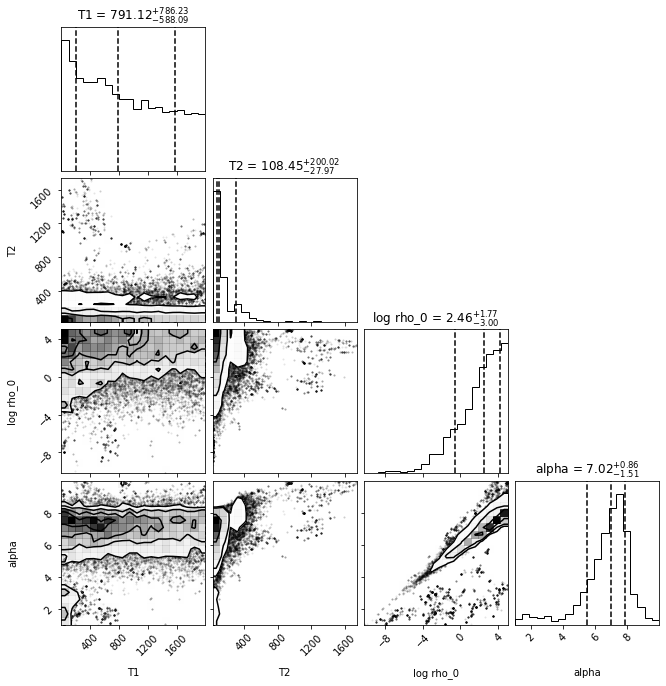

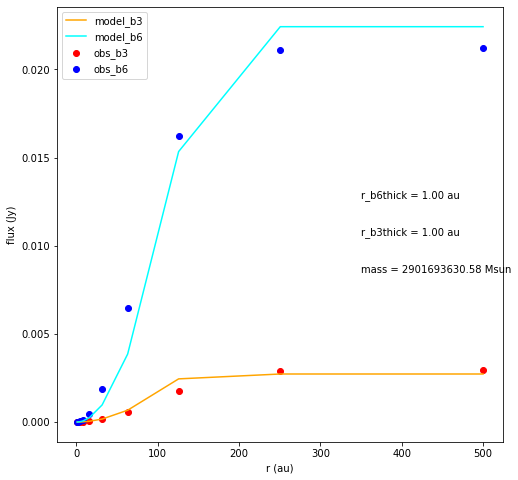

flux_apertures [9.09398814e-08 3.61788567e-07 1.43861587e-06 5.70949976e-06
 2.24869516e-05 8.59391999e-05 2.92865914e-04 6.84213853e-04
 8.31709913e-04 8.32580510e-04] [1.34315839e-06 5.34364470e-06 2.12503910e-05 8.43677616e-05
 3.32758262e-04 1.27884084e-03 4.44971373e-03 1.10546029e-02
 1.42593542e-02 1.42984304e-02]
159.3187149729257 171.79601858307097
spectral index 3.190570266335847
flux 0.0008279680863168688 0.012885580272617169
Running burn-in...
Running production...
elapsed time,  2494.6904530525208
[1286.73073729  131.17498121   -6.22233089    3.47402803]
r_thick 1.0000636538123175 AU 1.0000133805934994 AU
mass 25.34541317451065 solMass
verbose turned on
0 1.0
case 1  13640.535990945957 65341.33197934851 3.425435527222013e-16 Hz3 J s3 / m2 1.986366384764248e-15 Hz3 J s3 / m2
flux 1.719328912950243e-07 Jy 9.970169135856775e-07 Jy
verbose turned on
1 1.994736598775028
case 3  2503.303511616202 11907.6107015078 3.425435527222013e-16 Hz3 J s3 / m2 1.986366384764248e-15 Hz3 J s3

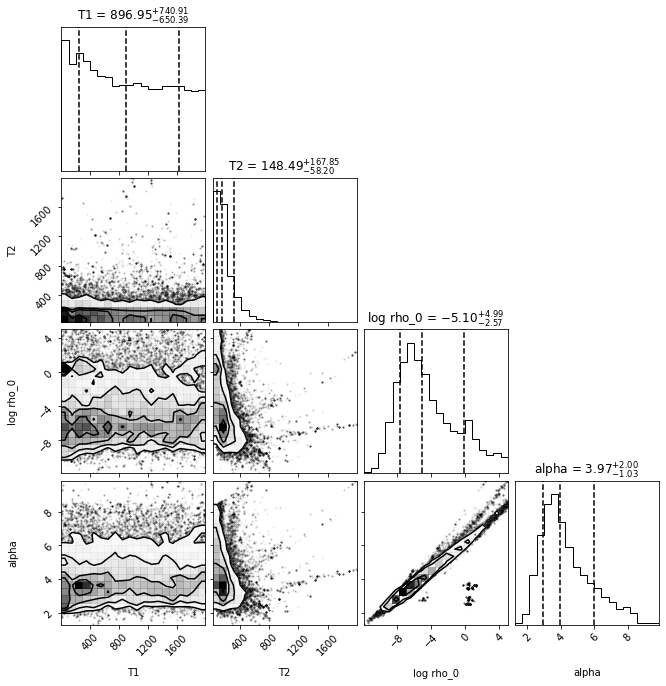

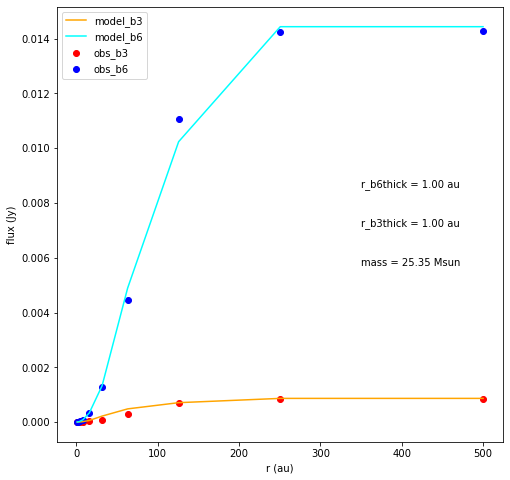

flux_apertures [7.13625432e-08 2.83932562e-07 1.12948886e-06 4.48991275e-06
 1.77974752e-05 6.97561511e-05 2.61596439e-04 8.32214226e-04
 1.62223267e-03 1.75990721e-03] [7.01365486e-07 2.79035142e-06 1.10969806e-05 4.40636340e-05
 1.73897704e-04 6.69894048e-04 2.35161247e-03 6.00264347e-03
 7.98301131e-03 8.01584486e-03]
261.49093922624803 178.006426752552
spectral index 1.7012922886775086
flux 0.0013649457461969207 0.006739543514629275
Running burn-in...
Running production...
elapsed time,  2063.172778367996
[1510.88931709   46.38473693    4.94816822    7.96293634]
r_thick 1.0000000000000004 AU 1.0 AU
mass 378363907893.4337 solMass
verbose turned on
0 1.0
case 2  1145320746525989.0 5448014729480181.0 1.1737884353114874e-16 Hz3 J s3 / m2 6.498171564157985e-16 Hz3 J s3 / m2
flux 5.891596494750975e-08 Jy 3.2616273646897946e-07 Jy
verbose turned on
1 1.994736598775028
case 3  9350678321332.41 44478920246298.016 1.1737884353114874e-16 Hz3 J s3 / m2 6.498171564157985e-16 Hz3 J s3 / m2
flux 

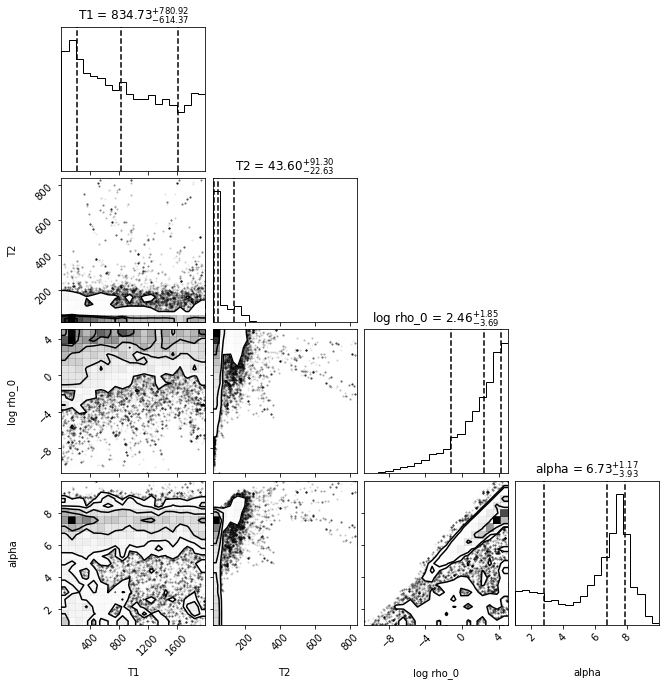

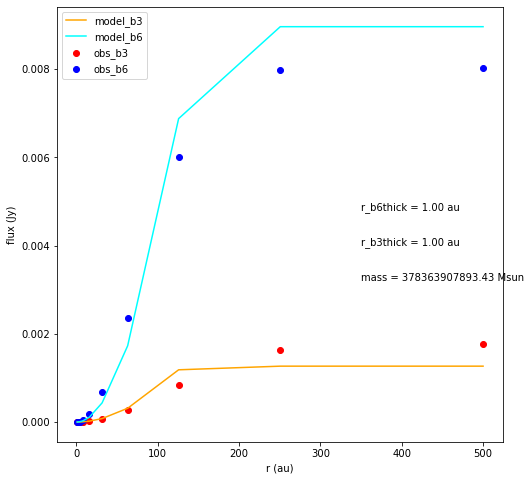

flux_apertures [4.62547455e-08 1.84041097e-07 7.32210270e-07 2.91210857e-06
 1.15660670e-05 4.56884473e-05 1.76651707e-04 6.28797000e-04
 1.67669107e-03 2.35756096e-03] [1.10628551e-06 4.40128114e-06 1.75030843e-05 6.94941946e-05
 2.74155739e-04 1.05454075e-03 3.68126049e-03 9.23671829e-03
 1.20445177e-02 1.20828638e-02]
377.3733639158449 174.01396859644743
spectral index 1.8337025977986277
flux 0.0015560767436361784 0.011168745601525686
Running burn-in...
Running production...
elapsed time,  1215.032392501831
[1931.60207143   65.55755481    4.998428      7.95618321]
r_thick 1.0000000000000004 AU 1.0 AU
mass 425364104834.3483 solMass
verbose turned on
0 1.0
case 2  1286508337217552.2 6119610067135706.0 1.6827931835049527e-16 Hz3 J s3 / m2 9.51548569652866e-16 Hz3 J s3 / m2
flux 8.44644411469061e-08 Jy 4.776107898919988e-07 Jy
verbose turned on
1 1.994736598775028
case 3  10552461140306.69 50195511099025.734 1.6827931835049527e-16 Hz3 J s3 / m2 9.51548569652866e-16 Hz3 J s3 / m2
flux 4.

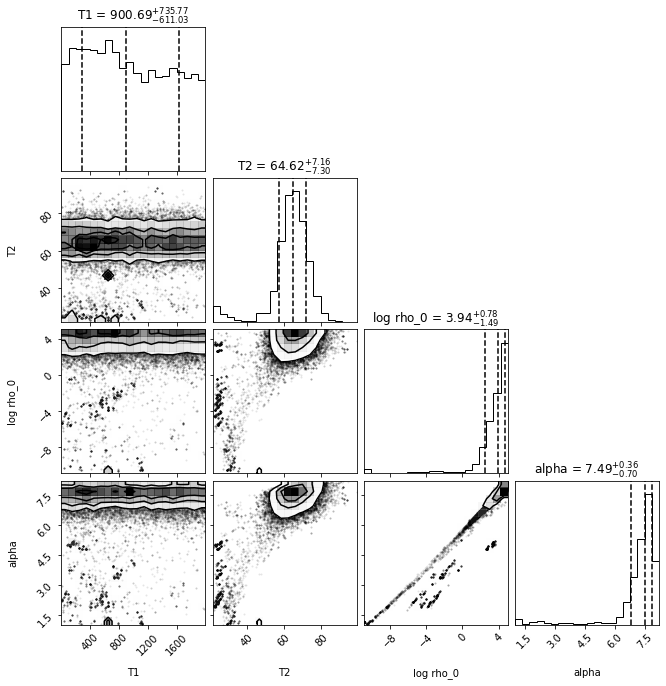

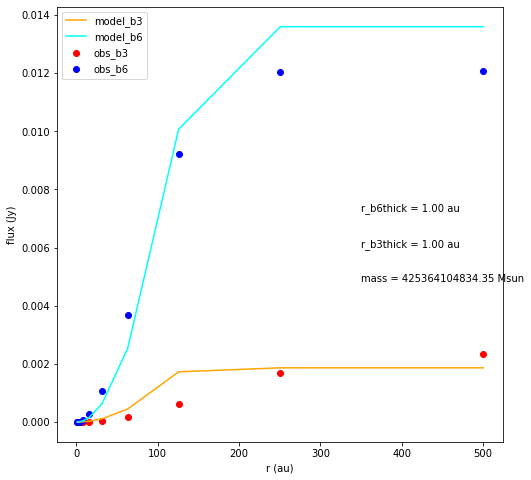

flux_apertures [2.08814832e-08 8.30829061e-08 3.30521814e-07 1.31414225e-06
 5.21321673e-06 2.04968240e-05 7.78057486e-05 2.58632697e-04
 5.63744023e-04 6.49957644e-04] [1.80887893e-06 7.19488559e-06 2.85871995e-05 1.13100680e-04
 4.39972169e-04 1.60287185e-03 4.61206404e-03 7.30377727e-03
 7.46652596e-03 7.46652778e-03]
293.8135654195474 106.97222105294715
spectral index 2.739374564053967
flux 0.0004094084071910979 0.005720763722221932
Running burn-in...
Running production...
elapsed time,  1376.1680552959442
[540.06099654 142.38728908  -4.27309295   4.59971907]
r_thick 1.0000007153839408 AU 1.0000001503929588 AU
mass 705.2167367969818 solMass
verbose turned on
0 1.0
case 1  987315.2876585668 4700727.32488964 3.723238686841136e-16 Hz3 J s3 / m2 2.1632992050491e-15 Hz3 J s3 / m2
flux 1.8688052579674088e-07 Jy 1.085824807106967e-06 Jy
verbose turned on
1 1.994736598775028
case 3  82354.4309161737 391740.15389803203 3.723238686841136e-16 Hz3 J s3 / m2 2.1632992050491e-15 Hz3 J s3 / m2
fl

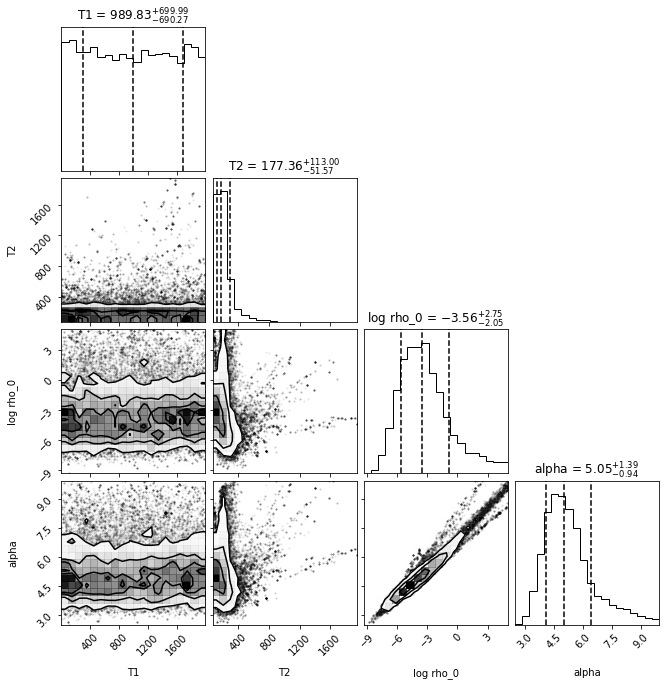

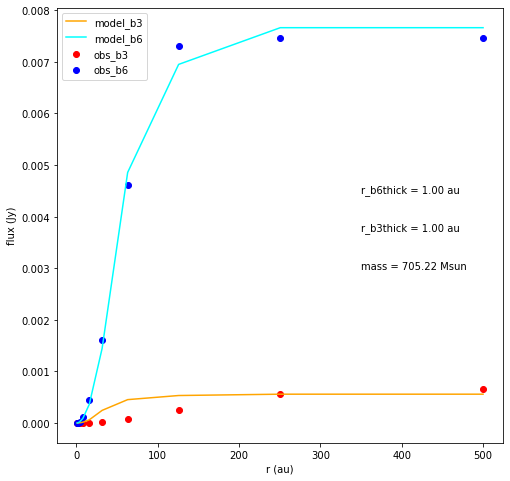

flux_apertures [7.75047798e-08 3.08371354e-07 1.22671421e-06 4.87651709e-06
 1.93317688e-05 7.57982513e-05 2.84670676e-04 9.10362446e-04
 1.79704993e-03 1.96051945e-03] [8.13804726e-07 3.23790194e-06 1.28802675e-05 5.11986737e-05
 2.02904340e-04 7.94635723e-04 2.97078478e-03 9.34720294e-03
 1.77529456e-02 1.90544934e-02]
264.8322386529812 254.78959987232594
spectral index 2.5517755333506824
flux 0.0008959355396379989 0.00924565976573736
Running burn-in...
Running production...
elapsed time,  2544.8904504776
[872.69621007  61.03468622  -1.47445786   5.09471943]
r_thick 1.0000000011373742 AU 1.000000000239107 AU
mass 338762.63598430564 solMass
verbose turned on
0 1.0
case 1  578470458.3314365 2751752383.542016 1.562703213941471e-16 Hz3 J s3 / m2 8.803147262566654e-16 Hz3 J s3 / m2
flux 7.843676509856264e-08 Jy 4.4185638565395356e-07 Jy
verbose turned on
1 1.994736598775028
case 3  34226733.58899798 162808312.00483465 1.562703213941471e-16 Hz3 J s3 / m2 8.803147262566654e-16 Hz3 J s3 / m2

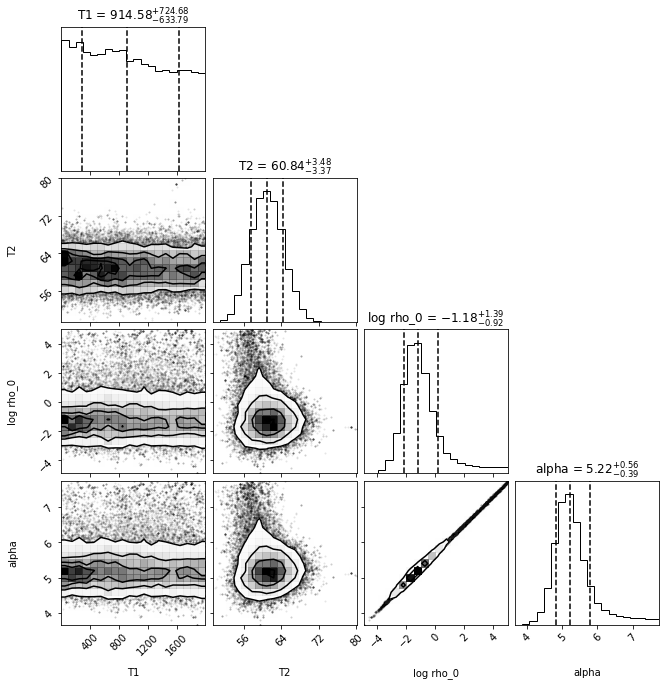

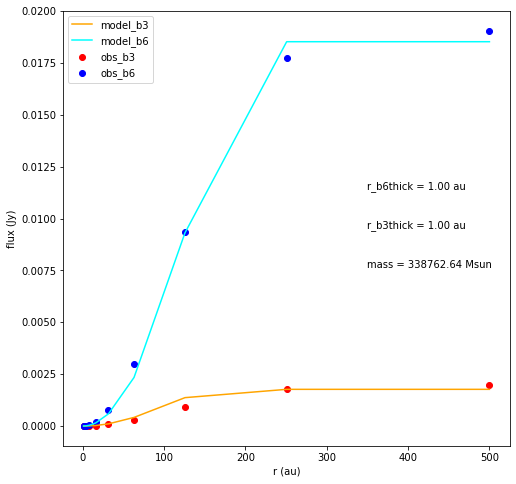

flux_apertures [2.08803450e-08 8.30771060e-08 3.30478618e-07 1.31365232e-06
 5.20626116e-06 2.03917094e-05 7.62700484e-05 2.40361561e-04
 4.58227947e-04 4.92548293e-04] [1.39046046e-06 5.52981416e-06 2.19588581e-05 8.66796991e-05
 3.34194313e-04 1.17692457e-03 3.03417589e-03 4.08369504e-03
 4.10313899e-03 4.10313899e-03]
255.74026973600053 90.44503291445963
spectral index 2.3787708815070925
flux 0.00041347000974706056 0.0032378518315986393
Running burn-in...
Running production...
elapsed time,  2454.0318150520325
[ 1.07060105e+03  8.41217363e+01 -2.94136334e-02  6.66658465e+00]
r_thick 1.0000000000408187 AU 1.0000000000085811 AU
mass 5392682.363036824 solMass
verbose turned on
0 1.0
case 1  13477124988.444698 64108001391.31244 2.175760354744217e-16 Hz3 J s3 / m2 1.2441267408684021e-15 Hz3 J s3 / m2
flux 1.0920794321872386e-07 Jy 6.244645563901047e-07 Jy
verbose turned on
1 1.994736598775028
case 3  269325515.9726954 1281116485.1980073 2.175760354744217e-16 Hz3 J s3 / m2 1.2441267408684

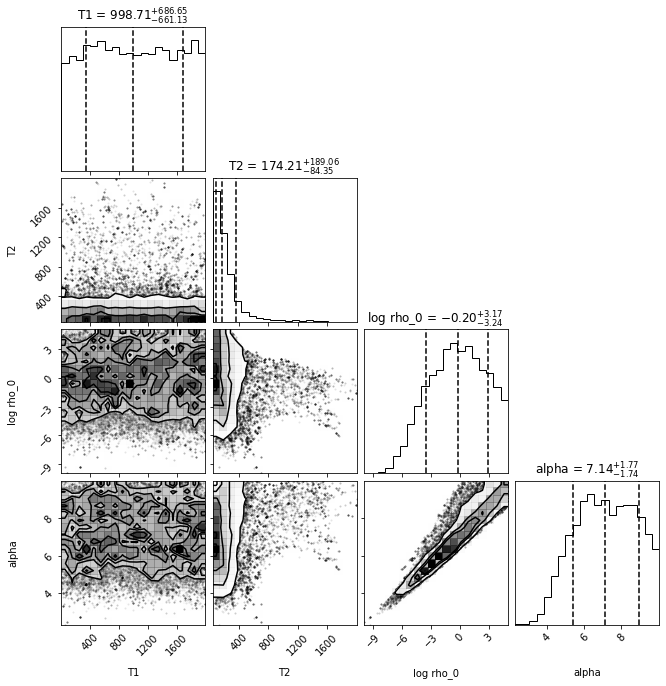

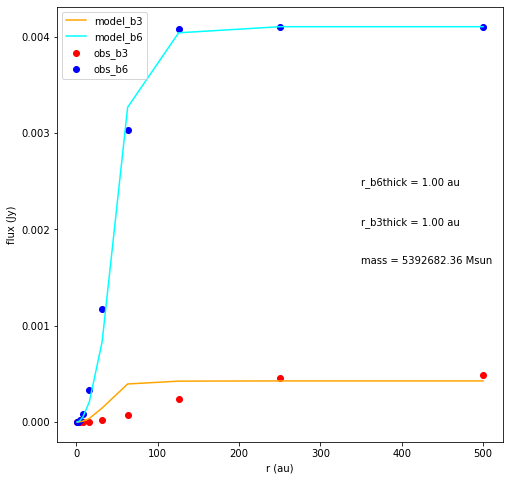

flux_apertures [4.04268581e-08 1.60853403e-07 6.39967910e-07 2.54540892e-06
 1.01121970e-05 3.99854445e-05 1.55212798e-04 5.60830955e-04
 1.57011422e-03 2.37404848e-03] [5.68063494e-07 2.26009695e-06 8.98949626e-06 3.57156694e-05
 1.41271976e-04 5.49080782e-04 1.99368969e-03 5.67266896e-03
 8.81057346e-03 8.97918693e-03]
406.58855221031376 209.34179918554418
spectral index 1.4927526979071595
flux 0.0016573439400217739 0.00884916965107044
flux_apertures [3.34197852e-08 1.32961521e-07 5.28814018e-07 2.10039963e-06
 8.29860835e-06 3.21100960e-05 1.14621182e-04 3.08426247e-04
 4.39196665e-04 4.43071163e-04] [1.33491645e-06 5.31028003e-06 2.11086175e-05 8.36616326e-05
 3.27745817e-04 1.22676012e-03 3.87628530e-03 7.43548854e-03
 8.01219507e-03 8.01242270e-03]
191.72089767142236 128.9969729355866
spectral index 3.2485191522218657
flux 0.00036614928196590697 0.007870302942303838
Running burn-in...
Running production...
elapsed time,  3045.9876227378845
[1799.90097564  150.33153214   -6.431914

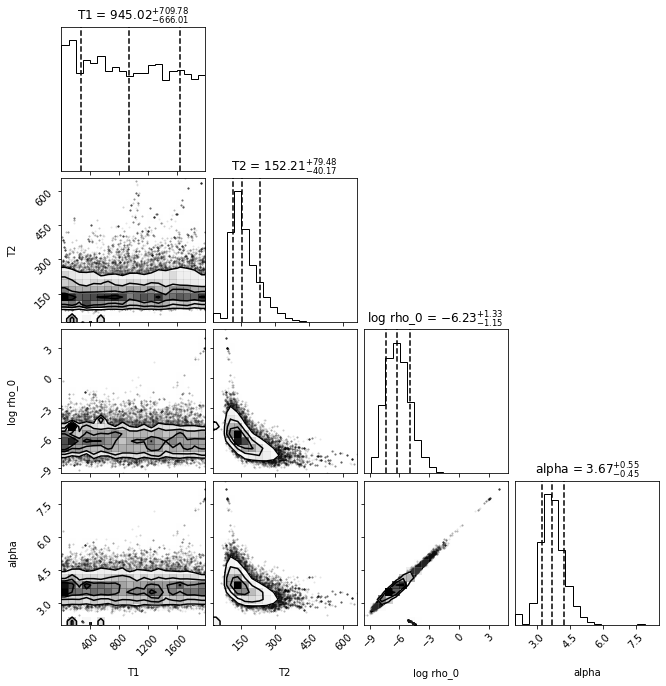

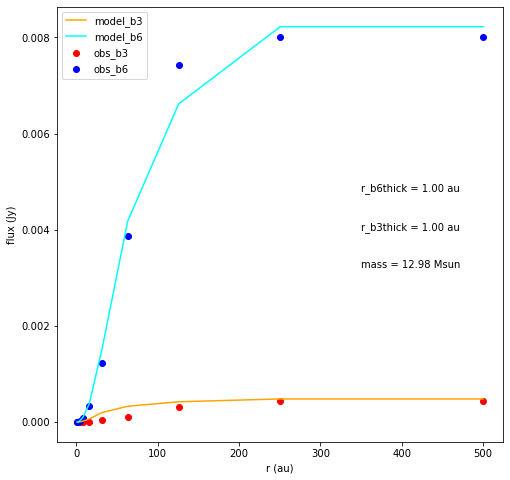

flux_apertures [5.50316967e-08 2.18959792e-07 8.71078572e-07 3.46351855e-06
 1.37420715e-05 5.40648806e-05 2.05750815e-04 6.90319998e-04
 1.54339830e-03 1.81142974e-03] [5.14961040e-07 2.04889945e-06 8.15066285e-06 3.24019298e-05
 1.28463210e-04 5.03904797e-04 1.89556678e-03 6.09743516e-03
 1.22096529e-02 1.34100972e-02]
302.17140850186064 268.7088951552989
spectral index 2.2463358571142824
flux 0.001652310217976127 0.011645744772563417
Running burn-in...
Running production...
elapsed time,  3753.537905693054
[1359.91025432   27.05975653   -3.137724      4.0578737 ]
r_thick 1.0000000523804913 AU 1.0000000110118026 AU
mass 14545.067631778229 solMass
verbose turned on
0 1.0
case 1  14823020.941082072 70525449.54671128 6.611420818721196e-17 Hz3 J s3 / m2 3.470887481547915e-16 Hz3 J s3 / m2
flux 3.318470564975774e-08 Jy 1.7421426131648824e-07 Jy
verbose turned on
1 1.994736598775028
case 3  1795169.9302113473 8539190.143271359 6.611420818721196e-17 Hz3 J s3 / m2 3.470887481547915e-16 Hz3 J

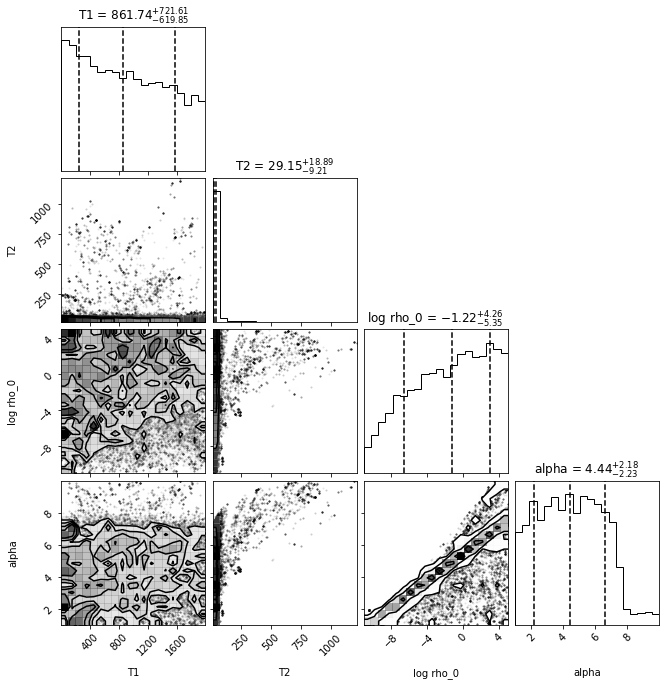

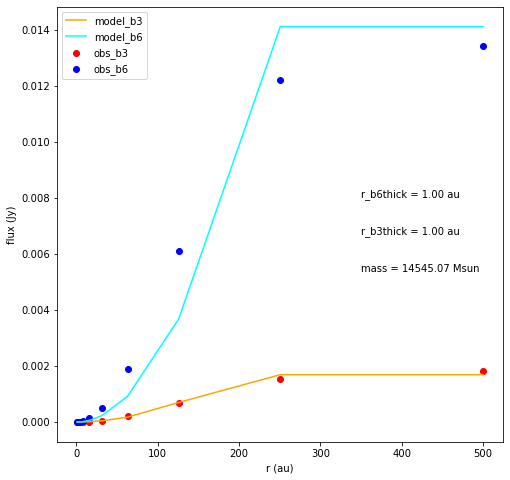

flux_apertures [5.24953116e-08 2.08870546e-07 8.30980641e-07 3.30471202e-06
 1.31218883e-05 5.17796671e-05 1.99376001e-04 6.98692309e-04
 1.77401925e-03 2.34468368e-03] [6.49050583e-07 2.58246152e-06 1.02740604e-05 4.08566876e-05
 1.62195839e-04 6.39530161e-04 2.45490808e-03 8.50414860e-03
 2.08477014e-02 2.65180151e-02]
352.5706136939761 336.9428681242731
spectral index 2.721864837704969
flux 0.002266832947363187 0.022403996952291564
Running burn-in...
Running production...


In [ ]:
import time
w51e_b3_flux_fits = Table.read(w51e_b3_flux)
w51e_b6_flux_fits = Table.read(w51e_b6_flux)
w51n_b3_flux_fits = Table.read(w51n_b3_flux)
w51n_b6_flux_fits = Table.read(w51n_b6_flux)
w51e_b6_flux_conv_fits = Table.read(w51e_b6_conv_flux)
w51n_b6_flux_conv_fits = Table.read(w51n_b6_conv_flux)

w51e_b3_major = w51e_b3_flux_fits['deconvolved_major'].value* np.pi/180 * 5.41*1000*206265
w51e_b6_major = w51e_b6_flux_fits['deconvolved_major'].value* np.pi/180 * 5.41*1000*206265
w51n_b3_major = w51n_b3_flux_fits['deconvolved_major'].value* np.pi/180 * 5.1*1000*206265
w51n_b6_major = w51n_b6_flux_fits['deconvolved_major'].value* np.pi/180 * 5.1*1000*206265
w51e_b3_minor = w51e_b3_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.41*1000*206265
w51e_b6_minor = w51e_b6_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.41*1000*206265
w51n_b3_minor = w51n_b3_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.1*1000*206265
w51n_b6_minor = w51n_b6_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.1*1000*206265



w51e_b3_int_flux = w51e_b3_flux_fits['flux']
w51e_b6_int_flux = w51e_b6_flux_conv_fits['flux']
w51n_b3_int_flux = w51n_b3_flux_fits['flux']
w51n_b6_int_flux = w51n_b6_flux_conv_fits['flux']

w51e_b3_int_fluxerr = w51e_b3_flux_fits['flux_upperr'] - w51e_b3_flux_fits['flux_lowerr']
w51e_b6_int_fluxerr = w51e_b6_flux_conv_fits['flux_upperr'] - w51e_b6_flux_conv_fits['flux_lowerr']
w51n_b3_int_fluxerr = w51n_b3_flux_fits['flux_upperr'] - w51n_b3_flux_fits['flux_lowerr']
w51n_b6_int_fluxerr = w51n_b6_flux_conv_fits['flux_upperr'] - w51n_b6_flux_conv_fits['flux_lowerr']
rmax=500
num=10
rarr = np.logspace(0,np.log10(rmax),num=num)
labels = ['T1', 'T2', 'log rho_0','alpha']
freqb3=92982346121.91989*u.Hz
freqb6=226691598706.70853*u.Hz
kappa_b3 = kappa(freqb3)
kappa_b6 = kappa(freqb6)
au_to_cm = (1*u.au).to(u.cm)
dist = 5.41*u.kpc
r_0 = 1*u.au
for i in range(len(w51e_b3_int_flux)):
    if any((w51e_b3_int_flux[i]<0, w51e_b6_int_flux[i]<0,
            ~np.isfinite(w51e_b3_int_flux[i]), ~np.isfinite(w51e_b6_int_flux[i]), 
            w51e_b3_major[i]<=0, w51e_b6_major[i]<=0)):
        continue
    start=time.time()
    nll = lambda *args: -lnlike(*args)
    initial = np.array([80, 40, -10 ,2])
    ndim = len(initial)
    nwalkers=100
    niter=512
    
    p0 = [np.array(initial) + [30,10,1,0.1] * np.random.randn(ndim) for i in range(nwalkers)]

    
    flux_b3 = flux_gaussian_multiple_apertures(w51e_b3_int_flux[i],w51e_b3_major[i], w51e_b3_minor[i], rarr)
    flux_b6 = flux_gaussian_multiple_apertures(w51e_b6_int_flux[i],w51e_b6_major[i], w51e_b6_minor[i], rarr)
    print('flux_apertures', flux_b3, flux_b6)
    print(w51e_b3_major[i],w51e_b6_major[i])
    spectral_index = np.log(flux_b3[-1]/flux_b6[-1])/np.log(freqb3/freqb6)
    print('spectral index',spectral_index )
    print('flux', w51e_b3_int_flux[i], w51e_b6_int_flux[i])
    if any((spectral_index>4, spectral_index<1.7)):
        continue
    
    data = (flux_b3, flux_b6, w51e_b3_int_fluxerr[i], w51e_b6_int_fluxerr[i], rarr)

    sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,lnprob,data)
    print('elapsed time, ',time.time()-start)

    samples = sampler.flatchain
    print(samples[np.argmax(sampler.flatlnprobability)])
    theta_max  = samples[np.argmax(sampler.flatlnprobability)]
    r_b3thick = r_0 * (1+(1-theta_max[3])/kappa_b3.value/(10**theta_max[2])/au_to_cm.value)**(1/(1-theta_max[3]))
    r_b6thick = r_0 * (1+(1-theta_max[3])/kappa_b6.value/(10**theta_max[2])/au_to_cm.value)**(1/(1-theta_max[3]))
    print('r_thick',r_b3thick,r_b6thick)
    mass = get_mass(10**theta_max[2], theta_max[3])
    print('mass', mass)
    
    f1,f2 = get_flux_aperture(theta_max, rarr, freqb3, freqb6, verbose=True )

    fig = corner.corner(samples,show_titles=True,labels=labels,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])
    
    fig = plt.figure(figsize=(8,8))
    model_b3, model_b6 = get_flux_aperture(theta_max, rarr, freqb3, freqb6, dist=dist )
    
    plt.plot(rarr, model_b3, c='orange', label='model_b3')
    plt.plot(rarr, model_b6, c='cyan', label='model_b6')
    plt.scatter(rarr, flux_b3, c='r', label='obs_b3')
    plt.scatter(rarr, flux_b6, c='b', label='obs_b6')
    plt.text(350, np.max(flux_b6)*0.6, 'r_b6thick = %3.2f'%r_b6thick.value+' au')
    plt.text(350, np.max(flux_b6)*0.5, 'r_b3thick = %3.2f'%r_b3thick.value+' au')
    plt.text(350, np.max(flux_b6)*0.4, 'mass = %3.2f'%mass.value+' Msun')

    plt.legend()
    plt.xlabel('r (au)')
    plt.ylabel('flux (Jy)')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()
    plt.close()